# Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Configurações adicionais

In [2]:
plt.style.use("seaborn-muted")
%matplotlib inline
pd.set_option('display.max_columns', None)


from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


# Carregando o banco de dados

In [0]:
banco = pd.read_csv("/content/drive/My Drive/Training_Dataset_v2.csv", low_memory = False)

In [4]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

# Transformações nas variáveis

## Retirando a variável sku

In [5]:
banco = banco.drop("sku", axis = 1)

banco.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


## Lidando com os valores NaN

- Nenhum ganho absurdo de diferença inputando a média, mediana ou moda (a mesma nos dá score parecidos);
- O melhor ganho, foi dropando os NAs e utilizando a estratégia de colocar o 999 no lugar deles.
    - A variável lead_time teve uma maior importância (0.03466);
    - O **recall** (nos dá informações sobre falsos negativos, de todos os exemplos que realmente são verdadeiros, o quanto meu modelo meu modelo previu corretamente), métrica que queremos maximizar, teve o valor de 0.51

In [6]:
banco.isnull().sum()

national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [7]:
#--- Para comentar as linhas: Ctrl + "/" (teclado numérico)

#--- Dropando todas


# banco = banco.dropna()

#--------------------------------------------------------------------

#--- Excluindo a última linha e imputando média na variável lead_time

# banco = banco[: -1] 

# banco["lead_time"] = banco["lead_time"].fillna(banco["lead_time"].mean())

#--------------------------------------------------------------------

#--- Excluindo a última linha e imputando média na variável lead_time

# banco = banco[: -1] 

# banco["lead_time"] = banco["lead_time"].fillna(banco["lead_time"].median())

#--------------------------------------------------------------------

#--- Excluindo a última linha e imputando a moda na variável lead_time

# banco = banco[: -1] 

# banco["lead_time"] = banco["lead_time"].fillna(banco["lead_time"].mode()[0])

#--------------------------------------------------------------------

#--- Excluindo a última linha e imputando o 0 na variável lead_time

banco = banco[: -1] 

banco["lead_time"] = banco["lead_time"].fillna(999)

banco.tail()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,No,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,-1.0,999.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


## Recodificando variáveis qualitativas para quantitativas

In [8]:
columns_yesno = ["potential_issue", "deck_risk", "oe_constraint", "ppap_risk", "stop_auto_buy", "rev_stop", "went_on_backorder"]

banco[columns_yesno] = banco[columns_yesno].replace({"No" : 0, "Yes": 1})

banco.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


## Criando novas features

In [9]:
#--- national_inv quadrado (Boa variável)

banco["national_inv_poly2"] = banco["national_inv"] ** 2


#--- 0 se national_inv < 0, 1 se >= 0 (Variável ruim)

banco["national_inv_qual"] = banco["national_inv"].map(lambda x: 0 if x <= 0 else 1)

# 0: Se x <= 0
# 1: Se x > 0


#--- Feature verificando se a lead_time (O tempo de trânsito do produto) é nulo ou não:

banco["lead_time_isnull"] = banco["lead_time"].map(lambda x: 1 if x == 999 else 0)


# Resultado: é uma boa variável para aumentar o Recall em 0.02 (0.54), apesar de aumentar um pouco os falsos positivos


#--- Tentativa de retirar variáveis que não foram importantes para o primeiro modelo:

# banco = banco.drop(["potential_issue", "rev_stop", "oe_constraint"], axis = 1)

# Resultado: O modelo diminui em 0.01 o Recall, coisa que não queremos


#--- Criando uma média para cada variável de meses

# banco["forecast_month_avg"] = banco[["forecast_3_month", "forecast_6_month", "forecast_9_month"]].mean(axis = 1)

# banco["sales_month_avg"] = banco[["sales_1_month", "sales_3_month", "sales_6_month", "sales_9_month"]].mean(axis = 1)

# banco["perf_month_avg"] = banco[["perf_6_month_avg", "perf_12_month_avg"]].mean(axis = 1)


# Resultado: São boas variáveis para diminuir os falsos positivos, entretanto aumenta os falsos negativos


#--- Verificamos através da correlação que quanto maior o nível de estoque atual da peça, maior a quantidade mínima do produto 
# recomendada para ficar em estoque, podemos criar uma razão entre elas:


banco["relat_minbank_nationalinv"] = banco["min_bank"]/banco["national_inv"]

banco["relat_minbank_nationalinv"] = banco["relat_minbank_nationalinv"].map(lambda x: 0 if x < 0 else 1)

# 0: Indica que a relação foi negativa
# 1: Indica que a relação foi positiva


# Resultado: Aumenta o recall em 0.01 mas também aumenta os falsos positivos (não tanto quanto a variável lead_time_isnull)
# Portanto, essa é a melhor feature para ganhar recall.


#--- Quanto maior a quantidade mínima do produto recomendada também são maiores os desempenhos do produto/loja nos períodos de meses 
# indicados.

# 0: Indica que a relação foi negativa
# 1: Indica que a relação foi positiva


# banco["new"] = banco["min_bank"]/banco["perf_6_month_avg"]

# banco["new"] = banco["new"].map(lambda x: 0 if x < 0 else 1)

# Resultados: não foi importante para o modelo


#--- Relacionar alguma variável com as features de desempenho por mês


#--- Criando uma feature baseada nos quartis das variáveis que possuem alta variação:

colunas = ["national_inv", "in_transit_qty", "min_bank", "national_inv_poly2"]
novas_colunas = [i + "_new" for i in colunas]

banco[novas_colunas] = banco[colunas].apply(lambda x: pd.qcut(x, 4, duplicates = "drop"), axis = 0)

# Resultado: Aumentaram o recall e a F1 em 0.1


#--- Criando um loop para verificar se cada valor para uma lista variáveis é maior que o percentil 95

# 1- Pegar o quartil 90 da coluna
# 2- Verificar se aquele valor é maior que o quartil 85

# for column in colunas:

#   novas_colunas1 = column + '_isabove85'

#   # print(novas_colunas1)

#   quart85 = banco[column].quantile(q = 0.85)

#   banco[novas_colunas1] = banco[column].map(lambda x: 1 if x >= quart85 else 0)

#   print(banco[novas_colunas1].value_counts())
#   print()


#--- Resultados: Mais ou menos útil, não melhorou em nada, somente os falsos positivos em um número bem pequeno, então vamos 
# ao princípio da parcimônia


# def isabovequant(df, quantile):

#   df1 = pd.DataFrame()

#   for column in df:

#     novas_colunas1 = column + "_isabove85"

#     selec_quantile = banco[column].quantile(q = quantile)

#     df1[novas_colunas1] = banco[column].map(lambda x: 1 if x >= selec_quantile else 0)

#   return(df1)


# isabovequant(df = banco[colunas], quantile = 0.85) 


ideia1 = ["national_inv", "in_transit_qty", "min_bank", "forecast_3_month", "forecast_6_month", "forecast_9_month",
          "sales_1_month", "sales_3_month", "sales_6_month", "sales_9_month"]


def isabovequant(df, quantile):

  for column in df:

    novas_colunas1 = column + '_isabove_quantile'

    selec_quantile = banco[column].quantile(q = quantile)

    banco[novas_colunas1] = banco[column].map(lambda x: 1 if x >= selec_quantile else 0)

    # print(banco[novas_colunas1].value_counts())
    # print()


isabovequant(df = banco[ideia1], quantile = 0.85) 


#--- Quadrado das ideias1

# novas_ideias1 = [i + "_2poly" for i in ideia1]

# banco[novas_ideias1] = banco[ideia1] ** 2

# Resultado: Não foram boas, somente as primeira


#--- Relacionar as variáveis de meses com as demais variávies

# 1. nível de estoque atual da peça x previsão de vendas para os próximos X meses


#--- Verificando se o valor é 0 para as variáveis forecast_3_month

def isequal0var(x):
  if x == 0:
    return(1)
  else:
    return(0)


banco["forecast_3_month_isequal0"] = banco["forecast_3_month"].apply(lambda x: isequal0var(x))

banco["sales_1_month_isequal0"] = banco["sales_1_month"].apply(lambda x: isequal0var(x))

banco["perf_6_month_avg_isbelow0"] = banco["perf_6_month_avg"].apply(lambda x: 1 if x <= 0 else 0)


# Resultado: boas variável
# Nota: Melhorar o script utilizando o applymap nos dados e não precisaria criar a função isequal0var. Exemplo:

# var1 = ["forecast_3_month", "sales_1_month", "perf_6_month_avg"]
# banco[var1].applymap(lambda x: isequal0var(x))

banco0 = banco[banco["went_on_backorder"] == 0]
banco1 = banco[banco["went_on_backorder"] == 1]


#--- national_inv_qual * forecast_3_month

# banco["relat_nationalinvqual_forecast3"] = banco["national_inv_qual"] * banco["forecast_3_month"]

#--- (1-NivelEstoque)*Previsão Vendas

banco["1relat_nationalinvqual_forecast3"] = (1 - banco["national_inv_qual"]) * banco["forecast_3_month"]

#--- 

banco.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,national_inv_poly2,national_inv_qual,lead_time_isnull,relat_minbank_nationalinv,national_inv_new,in_transit_qty_new,min_bank_new,national_inv_poly2_new,national_inv_isabove_quantile,in_transit_qty_isabove_quantile,min_bank_isabove_quantile,forecast_3_month_isabove_quantile,forecast_6_month_isabove_quantile,forecast_9_month_isabove_quantile,sales_1_month_isabove_quantile,sales_3_month_isabove_quantile,sales_6_month_isabove_quantile,sales_9_month_isabove_quantile,forecast_3_month_isequal0,sales_1_month_isequal0,perf_6_month_avg_isbelow0,1relat_nationalinvqual_forecast3
0,0.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0,0.0,0,1,1,"(-27256.001, 4.0]","(-0.001, 489408.0]","(-0.001, 3.0]","(-0.001, 16.0]",0,0,0,0,0,0,0,0,0,0,1,1,1,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0,4.0,1,0,1,"(-27256.001, 4.0]","(-0.001, 489408.0]","(-0.001, 3.0]","(-0.001, 16.0]",0,0,0,0,0,0,0,0,0,0,1,1,0,0.0
2,2.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0,4.0,1,1,1,"(-27256.001, 4.0]","(-0.001, 489408.0]","(-0.001, 3.0]","(-0.001, 16.0]",0,0,0,0,0,0,0,0,0,0,1,1,1,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0,49.0,1,0,1,"(4.0, 15.0]","(-0.001, 489408.0]","(-0.001, 3.0]","(16.0, 225.0]",0,0,0,0,0,0,0,0,0,0,1,1,0,0.0
4,8.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0,64.0,1,1,1,"(4.0, 15.0]","(-0.001, 489408.0]","(-0.001, 3.0]","(16.0, 225.0]",0,0,0,0,0,0,0,0,0,0,1,1,1,0.0


In [0]:
# # 1. nível de estoque atual da peça x previsão de vendas para os próximos X meses

# # 0: Se x <= 0
# # 1: Se x > 0

# banco_quant1 = banco1.select_dtypes(exclude = [object]).drop(['potential_issue', 'pieces_past_due', 'deck_risk', 'oe_constraint',
# 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder', 'national_inv_qual', 'lead_time_isnull', 'relat_minbank_nationalinv', 'national_inv_new', 'in_transit_qty_new',
# 'min_bank_new', 'national_inv_isabove_quantile', 'in_transit_qty_isabove_quantile', 'min_bank_isabove_quantile', 'forecast_3_month_isabove_quantile',
# 'forecast_6_month_isabove_quantile', 'forecast_9_month_isabove_quantile', 'sales_1_month_isabove_quantile', 'sales_3_month_isabove_quantile', 'sales_6_month_isabove_quantile',
# 'sales_9_month_isabove_quantile', 'forecast_3_month_isequal0', 'sales_1_month_isequal0', 'perf_6_month_avg_isbelow0'], axis = 1)


# f, axes = plt.subplots(5, 3, figsize = (20, 20), sharex = False)

# for ax, feature in zip(axes.flat, banco_quant1.columns):
#     sns.distplot(banco_quant1[feature] , color = "orangered", hist = False, ax = ax)

In [0]:
# banco_quant2 = banco0.select_dtypes(exclude = [object]).drop(['potential_issue', 'pieces_past_due', 'deck_risk', 'oe_constraint',
# 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder', 'national_inv_qual', 'lead_time_isnull', 'relat_minbank_nationalinv', 'national_inv_new', 'in_transit_qty_new',
#        'min_bank_new', 'national_inv_isabove_quantile',
#        'in_transit_qty_isabove_quantile', 'min_bank_isabove_quantile',
#        'forecast_3_month_isabove_quantile',
#        'forecast_6_month_isabove_quantile',
#        'forecast_9_month_isabove_quantile', 'sales_1_month_isabove_quantile',
#        'sales_3_month_isabove_quantile', 'sales_6_month_isabove_quantile',
#        'sales_9_month_isabove_quantile', 'forecast_3_month_isequal0',
#        'sales_1_month_isequal0', 'perf_6_month_avg_isbelow0'], axis = 1)


# # len(banco_quant1.columns)

# f, axes = plt.subplots(5, 3, figsize = (20, 20), sharex = False)

# for ax, feature in zip(axes.flat, banco_quant2.columns):
#     sns.distplot(banco_quant2[feature] , color = "orangered", hist = False, ax = ax)

In [0]:
# x = banco0["national_inv_poly2"]

# y = banco1["national_inv_poly2"]

# df = pd.concat([x, y], axis = 1)

# df.columns = ["N_houve_atraso", 'Houve_atraso']

# df = pd.melt(df, var_name='Category')

# g = sns.FacetGrid(df, col='Category', col_wrap=2, sharex=False, sharey=False, aspect=1.5)
# g = g.map(sns.distplot, "value", color="r", hist = 0)
# g.axes[0].set_xscale('log')
# g.axes[1].set_xscale('log')

## OneHotEncoding nas variáveis categóricas

In [13]:
banco = pd.get_dummies(data = banco, columns = novas_colunas,  drop_first = True)

banco.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,national_inv_poly2,national_inv_qual,lead_time_isnull,relat_minbank_nationalinv,national_inv_isabove_quantile,in_transit_qty_isabove_quantile,min_bank_isabove_quantile,forecast_3_month_isabove_quantile,forecast_6_month_isabove_quantile,forecast_9_month_isabove_quantile,sales_1_month_isabove_quantile,sales_3_month_isabove_quantile,sales_6_month_isabove_quantile,sales_9_month_isabove_quantile,forecast_3_month_isequal0,sales_1_month_isequal0,perf_6_month_avg_isbelow0,1relat_nationalinvqual_forecast3,"national_inv_new_(4.0, 15.0]","national_inv_new_(15.0, 80.0]","national_inv_new_(80.0, 12334404.0]","min_bank_new_(3.0, 313319.0]","national_inv_poly2_new_(16.0, 225.0]","national_inv_poly2_new_(225.0, 6400.0]","national_inv_poly2_new_(6400.0, 152137522035216.0]"
0,0.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0,0,0,0,0,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0,4.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0,0,0,0,0,0,0
2,2.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0,4.0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0,0,0,0,0,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0,49.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0.0,1,0,0,0,1,0,0
4,8.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0,64.0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,1,0,0,0,1,0,0


## Separando em treino e teste

In [0]:
from sklearn.model_selection import train_test_split


x_treino, x_teste, y_treino, y_teste = train_test_split(banco.drop("went_on_backorder", axis = 1), banco["went_on_backorder"], train_size = 0.7, random_state = 1234, stratify = banco["went_on_backorder"])

In [15]:
print(x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape)

(1181502, 46) (1181502,) (506358, 46) (506358,)


In [16]:
print(15*"---")

print("Proporção da variável target nos dados de treino:\n", y_treino.value_counts(normalize = True))

print(15*"---")

print("Proporção da variável target nos dados de treino:\n", y_teste.value_counts(normalize = True))

---------------------------------------------
Proporção da variável target nos dados de treino:
 0    0.993309
1    0.006691
Name: went_on_backorder, dtype: float64
---------------------------------------------
Proporção da variável target nos dados de treino:
 0    0.993309
1    0.006691
Name: went_on_backorder, dtype: float64


# Random forest

In [17]:
from sklearn.utils import class_weight

class_weights1 = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_treino),
                                                 y_treino)

class_weights1

array([ 0.50336785, 74.7313093 ])

## Cross-Validation

In [0]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators = 100, 
                             class_weight = {0: 0.5034, 1: 74.7370}, 
                             random_state = 1234, 
                             min_samples_leaf = 5, 
                             min_samples_split = 5,
                             max_depth = None,
                             n_jobs = -1)

In [19]:
%%time

from sklearn.model_selection import cross_validate 

scoring1 = [
    "accuracy", 
    "f1", 
    'f1_macro',
    'recall',
    'recall_macro',
    'precision',
    'precision_macro',          
    'roc_auc']

scores = cross_validate(rfc, x_treino, y_treino, cv = 4, scoring = scoring1, n_jobs = -1)

CPU times: user 430 ms, sys: 345 ms, total: 776 ms
Wall time: 8min 33s


In [20]:
scores


# import sklearn

# sorted(sklearn.metrics.SCORERS.keys())

{'fit_time': array([248.46294045, 233.11206913, 239.76043749, 234.28932118]),
 'score_time': array([16.63494658, 16.0479846 , 16.94021583, 12.10698915]),
 'test_accuracy': array([0.98542874, 0.98498524, 0.98523233, 0.98520525]),
 'test_f1': array([0.33682589, 0.33237995, 0.329748  , 0.34522026]),
 'test_f1_macro': array([0.66472966, 0.66239359, 0.66114096, 0.66886918]),
 'test_precision': array([0.24213558, 0.23660523, 0.23676081, 0.24521073]),
 'test_precision_macro': array([0.61954989, 0.61680112, 0.61682802, 0.62118798]),
 'test_recall': array([0.55313765, 0.55842185, 0.54301619, 0.58299595]),
 'test_recall_macro': array([0.7707389 , 0.77314069, 0.76561339, 0.78545501]),
 'test_roc_auc': array([0.96695164, 0.96079447, 0.96263566, 0.96148361])}

## Aplicando a RF nos dados de teste

In [21]:
%%time

rfc.fit(x_treino, y_treino)

y_pred = rfc.predict(x_teste)

CPU times: user 6min 36s, sys: 702 ms, total: 6min 37s
Wall time: 3min 21s


# Métricas a serem avaliadas


In [22]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_teste, y_pred)

print("Accuracy:", acc)

Accuracy: 0.9852416669628997


In [23]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_teste, y_pred))

[[496849   6121]
 [  1352   2036]]


In [24]:
pd.crosstab(y_teste, y_pred, rownames = ["True"], colnames = ["Predicted"], margins = True)

Predicted,0,1,All
True,,,
0,496849,6121,502970
1,1352,2036,3388
All,498201,8157,506358


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    502970
           1       0.25      0.60      0.35      3388

    accuracy                           0.99    506358
   macro avg       0.62      0.79      0.67    506358
weighted avg       0.99      0.99      0.99    506358



In [26]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_teste, y_pred)

0.3465283572144585

In [27]:
from sklearn.metrics import fbeta_score

fbeta_score(y_teste, y_pred, beta = 2)

0.4689299368925331

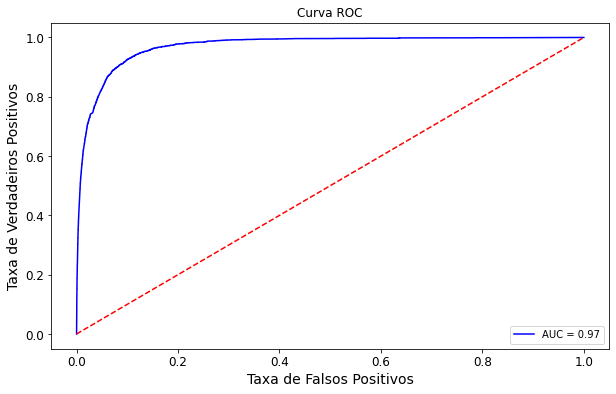

In [28]:
#--- Adaptado de: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

import sklearn.metrics as metrics

probs = rfc.predict_proba(x_teste)
preds = probs[:,1]
fpr, vpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, vpr)

#--- Curva

plt.figure(figsize = [10, 6])
plt.title("Curva ROC")
plt.plot(fpr, vpr, "blue", label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.ylabel("Taxa de Verdadeiros Positivos", fontsize = 14, color = "black")
plt.xlabel("Taxa de Falsos Positivos", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

# Importância das variáveis para o modelo de Random Forest

In [29]:
pd.DataFrame(rfc.feature_importances_, x_teste.columns).reset_index().rename(columns = {0: "Valor", "index": "Variável"}).sort_values("Valor", ascending = False).round(5)

,Variável,Valor
0,national_inv,0.10581
3,forecast_3_month,0.10388
5,forecast_9_month,0.08497
4,forecast_6_month,0.08361
21,national_inv_poly2,0.08065
35,forecast_3_month_isequal0,0.04819
9,sales_9_month,0.04272
7,sales_3_month,0.04153
8,sales_6_month,0.04048
14,perf_12_month_avg,0.03905


# Próximos passos:

1. Criar novas features;
    - Relacionar a forecast_3_month com alguma variável;
2. Verificar a relação das variáveis (esqueci hoje);
3. Observar as variáveis national_inv e lead_time;
4. Testar o método de oversampling e undersampling.


Falso positivo: o modelo previu que era um pedido em atraso, quando não era 
um pedido em atraso

Falso negativo (*): o modelo disse que não era um pedido em atraso, quando na verdade ele era

- Focar na métrica Recall